# Data exploration

### Check input data

In [70]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [71]:
image_dir = "data/training/images"  
mask_dir = "data/training/groundtruth"

In [72]:
def load_image_and_mask(image_name, mask_dir):
    image_path = os.path.join(image_dir, image_name)
    mask_path = os.path.join(mask_dir, image_name)
    image = np.array(Image.open(image_path))
    mask = np.array(Image.open(mask_path))
    return image, mask

In [73]:
def check_mask_format(mask):
    unique_values = np.unique(mask)
    is_binary = set(unique_values).issubset({0, 255}) 
    return is_binary, unique_values

In [74]:
def verify_alignment(image, mask):
    return image.shape[:2] == mask.shape

In [75]:
def validate_dataset(image_dir, mask_dir, num_samples=5):
    image_files = os.listdir(image_dir)
    mask_files = os.listdir(mask_dir)

    assert len(image_files) == len(mask_files), "Mismatch in number of images and masks"
    
    sampled_files = np.random.choice(image_files, num_samples, replace=False)
    
    for image_name in sampled_files:
        print(f"Validating {image_name}...")
        image, mask = load_image_and_mask(image_name, mask_dir)
        
        # Check binary format of the mask
        is_binary, unique_values = check_mask_format(mask)
        if not is_binary:
            print(f"⚠️ Mask {image_name} is not binary! Unique values: {unique_values}")
        else:
            print(f"✔️ Mask {image_name} is binary. Unique values: {unique_values}")
        
        # Verify alignment
        aligned = verify_alignment(image, mask)
        if not aligned:
            print(f"❌ Image and mask {image_name} are not aligned!")
        else:
            print(f"✔️ Image and mask {image_name} are aligned.")

        # Sattelite image
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title("Satellite image")
        plt.axis('off')
        
        # Mask 
        plt.subplot(1, 2, 2)
        plt.imshow(mask, cmap='gray')
        plt.title("Binary mask")
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()

Validating satImage_071.png...
⚠️ Mask satImage_071.png is not binary! Unique values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  61  62  63  65  66  67  70  71  72  73  74  75  76  77
  78  79  81  82  83  84  86  87  88  89  90  91  92  93  94  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 153 154
 155 156 157 158 159 160 161 163 164 165 166 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 200 201 202 203 204 206 207 208 209 210 211 212 214
 215 216 217 218 219 221 222 225 226 227 228 229 230 231 232 233 234 235
 236 237]
✔️ Image and mask satImage_0

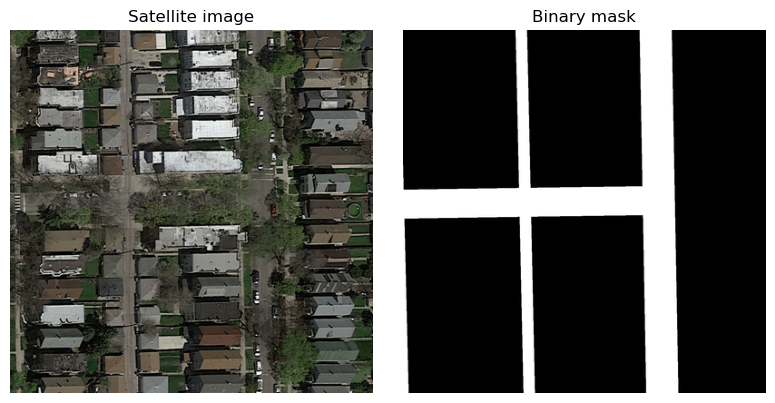

Validating satImage_042.png...
⚠️ Mask satImage_042.png is not binary! Unique values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 2

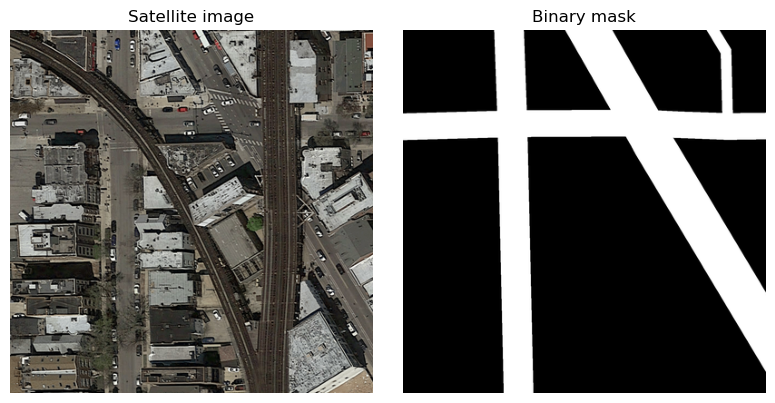

Validating satImage_056.png...
⚠️ Mask satImage_056.png is not binary! Unique values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  24  27  28  29  30  31  32  33  34  35  36  37  38
  39  41  44  45  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  64  65  66  67  69  70  71  72  73  74  75  76  77  78  79  80
  81  83  86  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 110 111 112 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 157 159 160 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 179 181 183 184 185 186 188 189
 190 191 192 193 194 195 196 197 198 200 201 203 204 205 206 207 208 209
 210 211 212 213 215 216 217 218 219 220 221 222 223 224 225 226 227 228
 230 231 232 233 234 235 236 237]
✔️ Image and mask satImage_056.png are aligned.


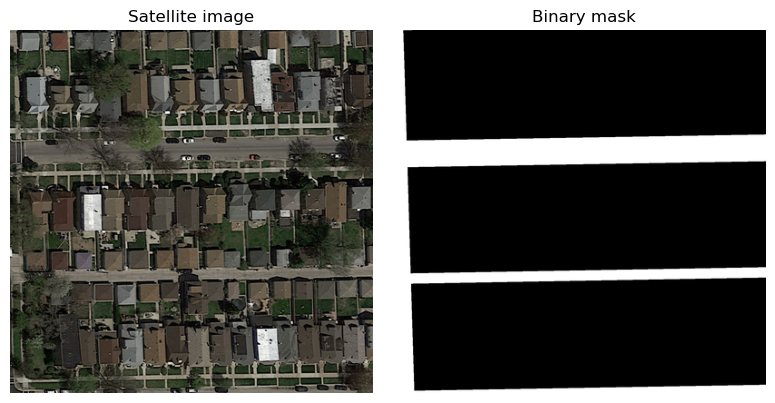

Validating satImage_029.png...
⚠️ Mask satImage_029.png is not binary! Unique values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 2

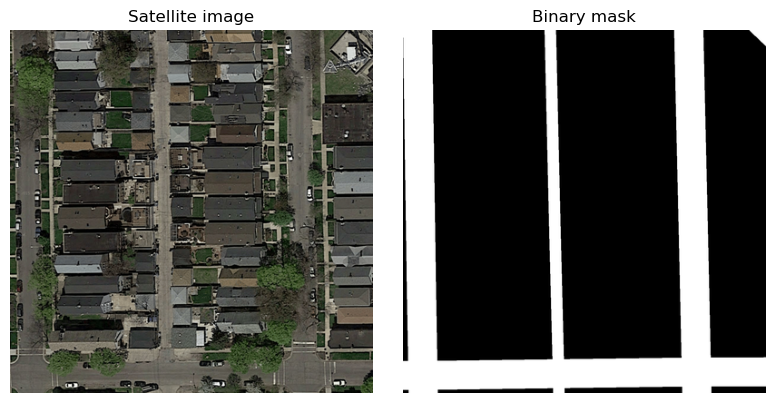

Validating satImage_046.png...
⚠️ Mask satImage_046.png is not binary! Unique values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 2

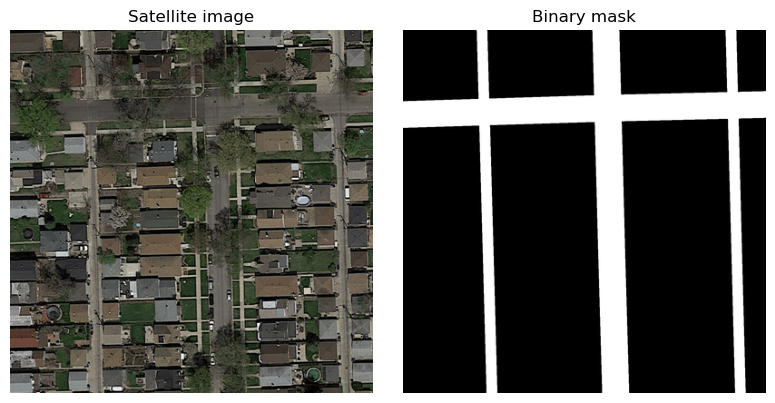

In [76]:
validate_dataset(image_dir, mask_dir, num_samples=5)

The mask contains pixels that are grey; the following function is converting any grey pixels into black or white pixels using a threshold of 128.

In [77]:
def binarize_mask(mask, threshold=128):
    """
    Converts a non-binary mask into a binary mask using a threshold.
    
    Parameters:
        mask (numpy array): Input mask.
        threshold (int): Threshold for binarization (default: 128).
        
    Returns:
        binary_mask (numpy array): Binarized mask with values 0 and 1.
    """
    if mask.max() > 1:
        mask = mask / 255.0 
    
    binary_mask = (mask > threshold / 255.0).astype(np.uint8)
    return binary_mask


def process_masks(mask_dir, output_dir, threshold=128):
    """
    Processes all masks in a directory to ensure they are binary.
    
    Parameters:
        mask_dir (str): Path to directory containing masks.
        output_dir (str): Path to directory to save processed masks.
        threshold (int): Threshold for binarization.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    mask_files = os.listdir(mask_dir)
    
    for mask_file in mask_files:
        mask_path = os.path.join(mask_dir, mask_file)
        mask = np.array(Image.open(mask_path).convert('L')) 
        
        binary_mask = binarize_mask(mask, threshold)
        
        binary_mask_image = Image.fromarray((binary_mask * 255).astype(np.uint8))
        binary_mask_image.save(os.path.join(output_dir, mask_file))

In [78]:
process_masks_dir = "data/training/groundtruth_binarize"
process_masks(mask_dir, process_masks_dir, threshold=128)

Validating satImage_002.png...
✔️ Mask satImage_002.png is binary. Unique values: [  0 255]
✔️ Image and mask satImage_002.png are aligned.


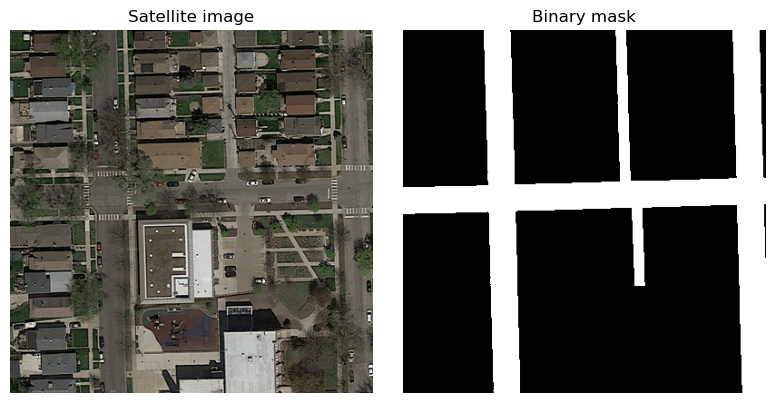

Validating satImage_008.png...
✔️ Mask satImage_008.png is binary. Unique values: [  0 255]
✔️ Image and mask satImage_008.png are aligned.


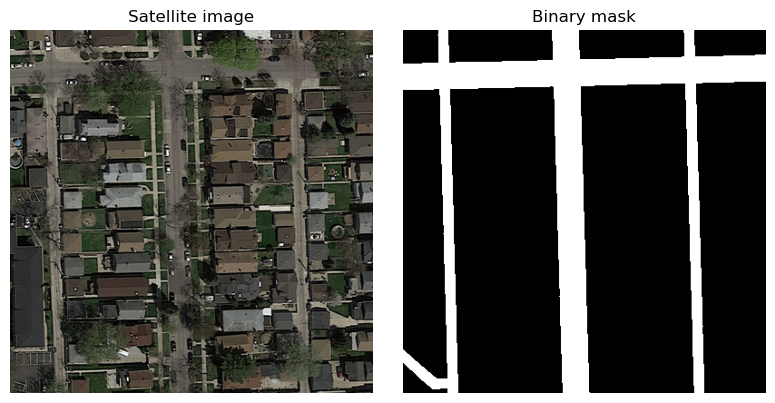

Validating satImage_037.png...
✔️ Mask satImage_037.png is binary. Unique values: [  0 255]
✔️ Image and mask satImage_037.png are aligned.


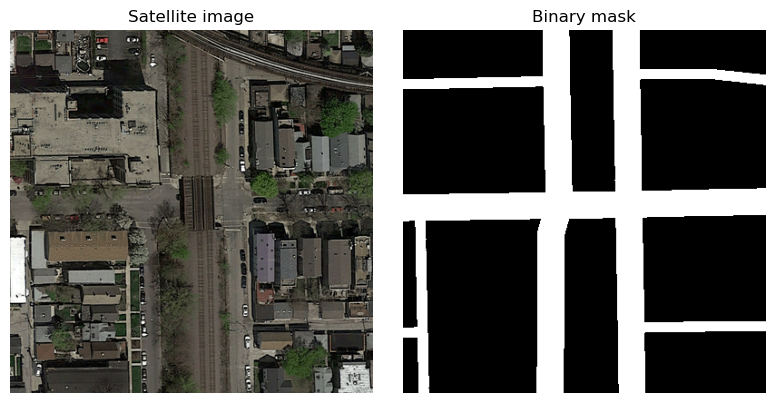

Validating satImage_064.png...
✔️ Mask satImage_064.png is binary. Unique values: [  0 255]
✔️ Image and mask satImage_064.png are aligned.


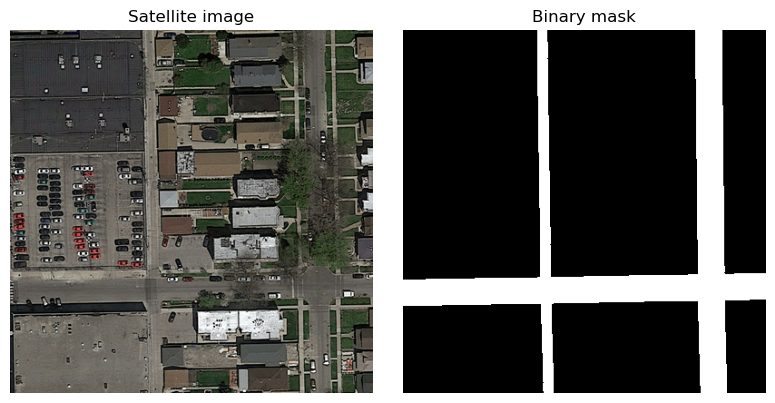

Validating satImage_080.png...
✔️ Mask satImage_080.png is binary. Unique values: [  0 255]
✔️ Image and mask satImage_080.png are aligned.


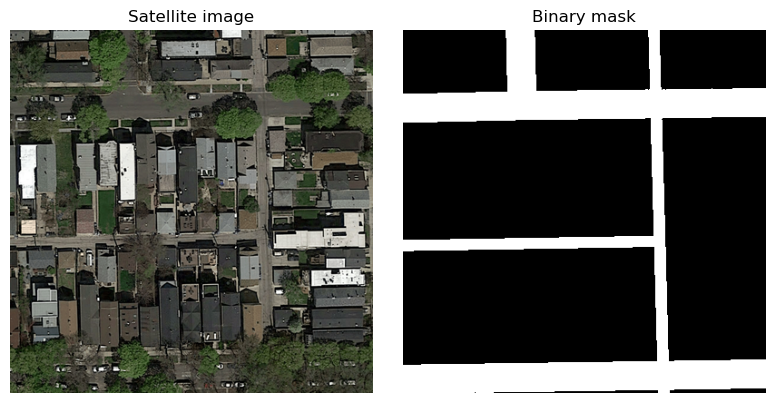

In [79]:
validate_dataset(image_dir, process_masks_dir, num_samples=5)

In [80]:
def plot_pixel_value_distribution(image_dir, num_samples=5):
    image_files = os.listdir(image_dir)
    sampled_files = np.random.choice(image_files, num_samples, replace=False)

    print("Analysis of image pixel values:")
    
    plt.figure(figsize=(12, 6))
    for image_name in sampled_files:
        image = np.array(Image.open(os.path.join(image_dir, image_name)))
        
        # BW image
        if len(image.shape) == 2:  
            plt.hist(image.ravel(), bins=256, color='gray', alpha=0.7, label='Grayscale Image')
        # RGB image
        elif len(image.shape) == 3: 
            colors = ['red', 'green', 'blue']
            for i, color in enumerate(colors):
                plt.hist(image[:, :, i].ravel(), bins=256, color=color, alpha=0.5, label=f'{color.upper()} Channel')
    
    plt.title("Pixel value distribution")
    plt.xlabel("Pixel intensity")
    plt.ylabel("Frequency")
    plt.legend(loc="upper right")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()


def class_imbalance_analysis(mask_dir):
    mask_files = os.listdir(mask_dir)
    
    total_pixels = 0
    road_pixels = 0
    
    for mask_name in mask_files:
        mask = np.array(Image.open(os.path.join(mask_dir, mask_name)))/255
        
        # Ensure the mask is binary
        assert set(np.unique(mask)).issubset({0, 1}), f"Mask {mask_name} is not binary!"
        
        total_pixels += mask.size
        road_pixels += np.sum(mask)
    
    non_road_pixels = total_pixels - road_pixels
    road_percentage = (road_pixels / total_pixels) * 100
    non_road_percentage = (non_road_pixels / total_pixels) * 100
    
    print("Class imbalance analysis:")
    print(f"Total pixels: {total_pixels}")
    print(f"Road pixels (white): {road_pixels} ({road_percentage:.2f}%)")
    print(f"Non-road pixels (black): {non_road_pixels} ({non_road_percentage:.2f}%)")
    
    plt.figure(figsize=(6, 6))
    plt.pie([road_pixels, non_road_pixels], labels=["Road", "Non-Road"], autopct='%1.1f%%', colors=['orange', 'blue'])
    plt.title("Class distribution in masks")
    plt.show()


def analyze_dataset(image_dir, mask_dir):

    plot_pixel_value_distribution(image_dir)
    class_imbalance_analysis(mask_dir)

Analysis of image pixel values:


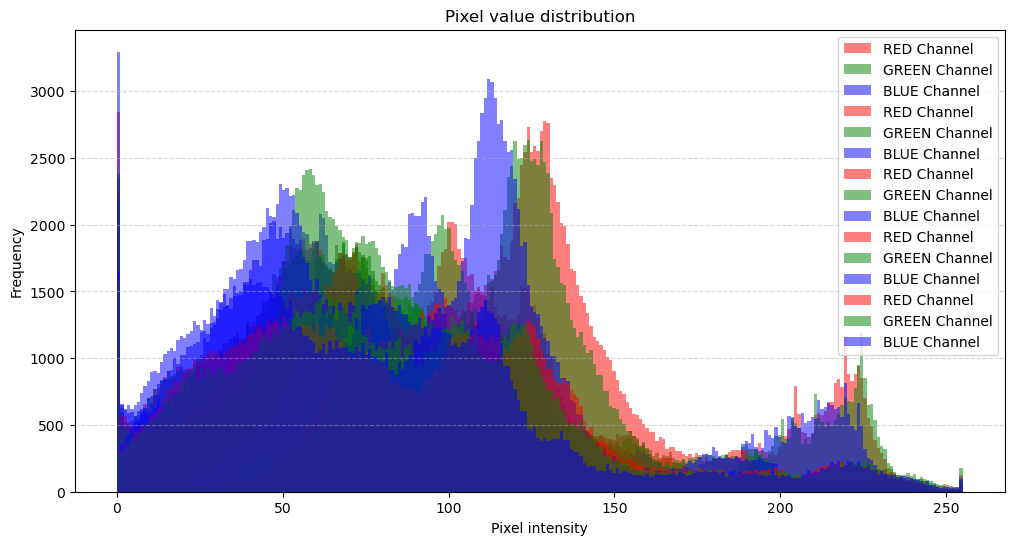

Class imbalance analysis:
Total pixels: 16000000
Road pixels (white): 3206368.0 (20.04%)
Non-road pixels (black): 12793632.0 (79.96%)


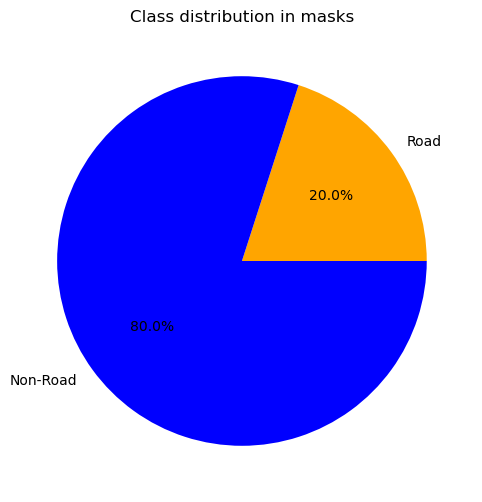

In [81]:
analyze_dataset(image_dir, process_masks_dir)

About 20% of the pixels in the images corresponds to a road. We will probably need to do class weighing.

In [82]:
def spatial_distribution_analysis(mask_dir, grid_size=(10, 10)):
    """
    Analyzes the spatial distribution of road pixels across binary masks.
    
    Parameters:
        mask_dir (str): Directory containing binary masks.
        grid_size (tuple): Size of grid for aggregation (rows, columns).
    """
    mask_files = os.listdir(mask_dir)
    
    grid_road_density = np.zeros(grid_size, dtype=np.float32)
    
    for mask_name in mask_files:
        mask = np.array(Image.open(os.path.join(mask_dir, mask_name)))/255
        
        assert set(np.unique(mask)).issubset({0, 1}), f"Mask {mask_name} is not binary!"
        
        # Divide mask into grid regions and calculate road density
        h, w = mask.shape
        grid_h, grid_w = grid_size
        cell_h, cell_w = h // grid_h, w // grid_w
        
        for i in range(grid_h):
            for j in range(grid_w):
                cell = mask[i * cell_h:(i + 1) * cell_h, j * cell_w:(j + 1) * cell_w]
                grid_road_density[i, j] += np.sum(cell)
    
    # Normalize road density by the total number of pixels per cell
    total_pixels_per_cell = (mask.shape[0] // grid_size[0]) * (mask.shape[1] // grid_size[1])
    grid_road_density /= (len(mask_files) * total_pixels_per_cell)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(grid_road_density, cmap="hot", interpolation="nearest")
    plt.colorbar(label="Average road density")
    plt.title("Spatial distribution of road pixels")
    plt.xlabel("Grid column")
    plt.ylabel("Grid row")
    plt.show()

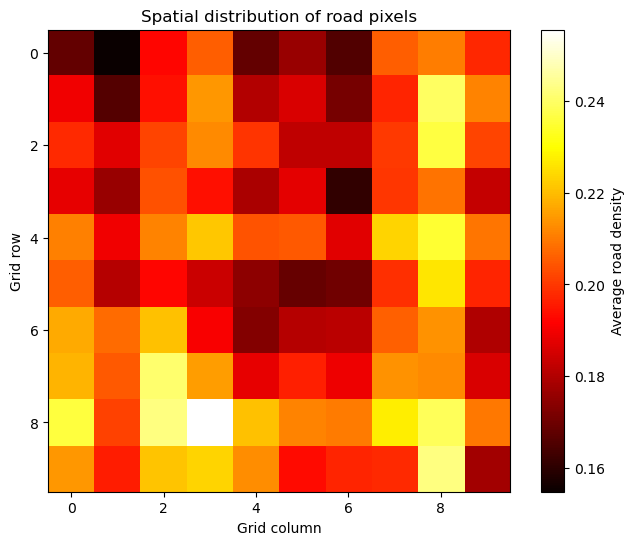

In [83]:
spatial_distribution_analysis(process_masks_dir, grid_size=(10, 10))

The pixels corresponding to a road seem to be less likely to be located in the top left corner of the satellite image. To avoid any biases, we should do data augmentation through rotations and flips.